# 3.4 IMDB example (binary classification)

## 3.4.1 IMDB dataset

## IMDB dataset: a set of 50,000 higly polarized reviews from the Internet Movie Database, split into half for training and half for testing, each cosnisting of half-to-half positive &  negative reviews

## The reviews (sequence of words) have been turned into sequence of  integers, where each stands for a specific word in a dictionary

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 500)

Using TensorFlow backend.
/home/yanbo/.local/lib/python3.6/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/yanbo/.local/lib/python3.6/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### The argument num_words = 10000 means you'll only keep the top 10,000 most frequently occurring words in the training data, rare words will be discarded. Any other out-of-dictionary words will appear as *oov_char* value (default is 2)
### The warning as above will occur as the length of lists in arrays differ (different reviews have different number of words); 
### train_data & test data are lists of reviews; each review is  a list of word indices(encoding a sequence of words) 

In [2]:
train_data.shape

(25000,)

In [3]:
type(train_data)

numpy.ndarray

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [5]:
len(train_data[0])

218

In [6]:
len(train_data[1])

189

In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
test_data.shape

(25000,)

In [9]:
len(test_data[0])

68

In [10]:
print(test_data[0])

[1, 2, 202, 14, 31, 6, 2, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 2]


###  train_labels and test_labels are  lists of 0s and 1s (0  -- negative,  1 -- positive)

In [11]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
len(train_labels)

25000

### Beacuse you restrict the top 10,000 most frequent words, no word index  will exceed 10,000

In [14]:
max([max(sequence)  for sequence in  train_data])

499

### we can also quickly decode  one of these reviews back to English words

In [15]:
word_index = imdb.get_word_index()  # dict that maps words to an integer index

reverse_word_index = dict(
                          [(value, key) for (key, value) in word_index.items()])
# reverse, map integer indices to words

decoded_review  = ' '.join(
                           [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# indices are offset by 3 because 0, 1, 2 are reversed for 'padding', 'start of sequence', and 'unknown'

In [16]:
decoded_review

"? this film was just ? ? ? ? story direction ? really ? the part they played and you could just ? being there ? ? is an amazing actor and now the same being director ? father came from the same ? ? as ? so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so ? and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and ? they were just ? children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [17]:
print(reverse_word_index.get(11))

this


## 3.4.2 Preparing the data

### We can't feed list of integers into a neural network,  we need to turn lists into tensors

### Two ways:
### 1) Pad (填充）the lists so that they have the same length, then turn them into an integer tensor of shape (samples, word_indices), and use as the first layer in the network, a layer capable of handling such integer tensors (the *Embedding* layer
### 2) One-hot encode the lists to turn into vectors of 0s and 1s, and appear 1s at the indices where the number exists in this list (e.g. sequence[3, 5] into 10000-dimensional vector that would be all 0s except for indices 3 and 5) ---Then we usr the *Dense* layer as the first layer in the network, capable of handling floating-point vector data

In [38]:
# we use the second method
import numpy as np

def vectorize_sequences(sequences, dimension = 500):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results        

In [39]:
# enumerate is a useful built-in function which allows us to loop over something with an automative counter
my_list = ['apple', 'banana', 'watermelon']

for counter, value in enumerate(my_list, 1): # specify the counter as 1, 2, 3,...
    print(counter, value)

1 apple
2 banana
3 watermelon


In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
x_train[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [42]:
# also vectorize the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
test_labels.dtype

dtype('int64')

## 3.4.3 Building the network

### The input data is vectors(2D tensors) and the labels are scalars(0s, 1s), the type of network that performs well on such a problem is a simple stack of *fully connected (Dense)* layers with *relu* activations:

### Dense(16, activation = 'relu'): here 16 refers to the number of hidden units of the layer
### *hidden unit*:   a dimension in the representation space of the layer
### e.g. output = relu( dot(w, input) + b ), having 16 hidden units means the weight matrix w will have shape  (input_dimension, 16), the dot project with w project the input data onto a 16-dimensional representation space

### dimensionality --- how much freedom is allowed when learning internal representations, more hidden units allows the network to learn more complex representations, but more computationally expensive and may lead to overfitting

### Two architecture decisions to build the network fotr such a stack of Dense layers:
### 1) How many layers to use;
### 2) How many hidden units to choose for each layer;

### Here we use 1) Two intermediate layers with 16 hidden units each (activation = 'relu');
###                       2) a third layer that output the scalar prediction  (activation = 'sigmoid');

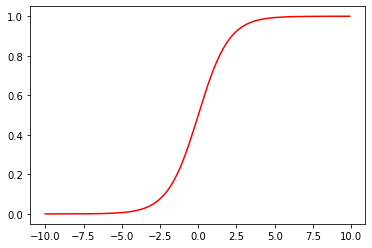

In [44]:
import math 
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.1)

# sigmoid
y1 = 1 / ( 1 + math.e ** (-x) )

plt.plot(x, y1, label = 'sigmoid', linestyle = '-', color = 'red')
plt.show()

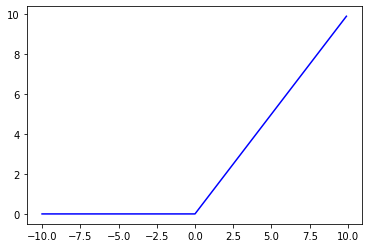

In [45]:
# relu
y2 = np.where(x<0, 0, x)

plt.plot(x, y2, label = 'relu', linestyle = '-', color = 'blue')
plt.show()

### The 3-layer network workflow:
### Input(vectorized text) ---> Dense(units =16) --->  Dense(units = 16)  ---> Dense(units = 1) ---> output(probability)

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (500, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

### Then we choose the optimizer and the loss functions: here we use *binary_crossentropy* for loss function
### *Crossentropy* --- a quantity that measures the distance between probability distributions

In [47]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### Here we pass the optimizer, loss function and metrics as *strings* as they are packaged in Keras;
### Sometimes we may want to see some variations:

### e.g. configure some parameters of your optimizer, done by passing an optimizer class instance as the optimizer argument

In [48]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

###  e.g. pass a custom loss function or metric function

In [49]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

## 3.5.4 Validating your approach

### In order to monitor the accuracy of the model on data during training, we creat a validation set by setting apart 10,000 samples from the original data

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### we now train for 20 epochs, in mini-baches of 512 samples. At the same time, we monitor the loss & accuracy on the 10,000 samples for validation (done by passing *validation_data* argument )

In [55]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose = 2)
# verbose = 2 means printing to controller each time one epoch is finished

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 - 0s - loss: 0.1194 - acc: 0.9621 - val_loss: 0.5419 - val_acc: 0.8289
Epoch 2/20
 - 0s - loss: 0.1190 - acc: 0.9626 - val_loss: 0.5386 - val_acc: 0.8266
Epoch 3/20
 - 0s - loss: 0.1162 - acc: 0.9633 - val_loss: 0.5709 - val_acc: 0.8256
Epoch 4/20
 - 0s - loss: 0.1150 - acc: 0.9631 - val_loss: 0.5479 - val_acc: 0.8260
Epoch 5/20
 - 0s - loss: 0.1105 - acc: 0.9660 - val_loss: 0.5531 - val_acc: 0.8221
Epoch 6/20
 - 0s - loss: 0.1089 - acc: 0.9665 - val_loss: 0.5722 - val_acc: 0.8279
Epoch 7/20
 - 0s - loss: 0.1071 - acc: 0.9673 - val_loss: 0.5767 - val_acc: 0.8257
Epoch 8/20
 - 0s - loss: 0.1056 - acc: 0.9676 - val_loss: 0.5756 - val_acc: 0.8269
Epoch 9/20
 - 0s - loss: 0.1020 - acc: 0.9703 - val_loss: 0.5863 - val_acc: 0.8232
Epoch 10/20
 - 0s - loss: 0.1029 - acc: 0.9688 - val_loss: 0.5831 - val_acc: 0.8243
Epoch 11/20
 - 0s - loss: 0.0984 - acc: 0.9713 - val_loss: 0.6007 - val_acc: 0.8246
Epoch 12/20
 - 0s - loss: 0.0970 - 

### model.fit( ) returns a *History* object. It has a member *history*, which is a dictionary containing data about everything happened during training. 

In [58]:
history_dict = history.history

In [59]:
history_dict

{'acc': [0.96213335,
  0.9626,
  0.9632667,
  0.96306664,
  0.966,
  0.96653336,
  0.9673333,
  0.9676,
  0.97026664,
  0.9688,
  0.9712667,
  0.9719333,
  0.9727333,
  0.9734,
  0.9746,
  0.9749333,
  0.9752,
  0.9766,
  0.9758,
  0.97726667],
 'loss': [0.11944629517793655,
  0.11896318790515265,
  0.11623698196808498,
  0.11499450817902883,
  0.11052943501472473,
  0.10886778679688772,
  0.10710734326839447,
  0.10561911454995473,
  0.10203327968915303,
  0.1028793021996816,
  0.0984267130335172,
  0.09696230314970017,
  0.09519132098754247,
  0.09417116177082062,
  0.0909943411787351,
  0.08991540801723798,
  0.08858095050652821,
  0.08681273704767227,
  0.08550790005524954,
  0.08291965459982555],
 'val_acc': [0.8288999795913696,
  0.8266000151634216,
  0.8256000280380249,
  0.8259999752044678,
  0.8220999836921692,
  0.8278999924659729,
  0.8256999850273132,
  0.8269000053405762,
  0.823199987411499,
  0.8242999911308289,
  0.8245999813079834,
  0.8219000101089478,
  0.82580000162

In [60]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### The dictionary contains 4 entries: one per metric that was being monitored during training & validation

### Visualization -- Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy (we may have different results due to a random initialization) 

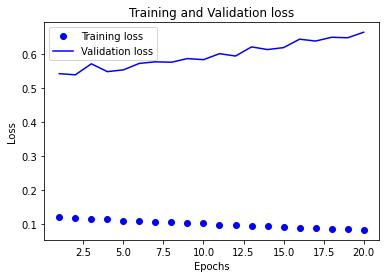

In [63]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')  # bo --> blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

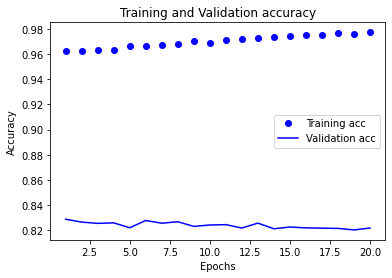

In [65]:
plt.clf() # clear the figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### The overfitting problem --- though the training loss decreases with each epoch (accuracy increases), which means the quantity we try to minimize is less with each iteration, for validation set it is not the case. It seems like the accuracy peaked at 4th epoch.

### Overfitting means we are overoptimizing on the training data and end up learning representations that are specific to the training data and do not generalize to data outside of the training set

### Let's train a new network from scrach for  4 epochs and then evaluate it on the test data

In [67]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (500, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [68]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512, verbose = 2)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 - 0s - loss: 0.5747 - accuracy: 0.7065
Epoch 2/4
 - 0s - loss: 0.4383 - accuracy: 0.8050
Epoch 3/4
 - 0s - loss: 0.3966 - accuracy: 0.8259
Epoch 4/4
 - 0s - loss: 0.3819 - accuracy: 0.8326
25000/25000 [==============================] - 1s 33us/step


In [69]:
results

[0.3894276275253296, 0.827239990234375]

## 3.4.5 Using trained network to generate predictions on new data

### we use the predict() method

In [70]:
model.predict(x_test)

array([[0.34291786],
       [0.9213077 ],
       [0.75294375],
       ...,
       [0.13256001],
       [0.07319972],
       [0.43916294]], dtype=float32)

### The network is confidnet for some samples (0.99 or more, 0.01 or less), but less confident for others (0.6, 0.4)

## 3.4.6 Further experiments

### 1) Use different number of hidden layers (before we use 2, we can try 1, 3, etc)
### 2) Try using layers with more or less hidden units (32, 64, etc)
### 3) Try using *mse* as the loss function instead of binary_crossentropy
### 4) Try using the *tanh*  activation instead of *relu*

### These experiments will help convince  you the architecture we've made are fairly reasonable, although still room for improvements